### Overfitting and Underfitting

Chollet "Deep Learnng with Python", Chapter 4 on Overfitting

See 

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb

Runs correctly under TF 1.15, checked 1/15/2021

When running this on Google Colab,  using a GPU and a high memory runtime configuration,  1/17/2023

In [1]:
import tensorflow as tf

In [2]:
# this cell is for tensorflow 2.0 and higher
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# this cell is for tensorflow 2.0 and higher
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
Check to see how much memory we have available

In [4]:
import psutil
    
psutil.virtual_memory().total  # total physical memory in Bytes

27331186688

Check to see what GPU we have

In [5]:
!nvidia-smi

Tue Jan 17 14:42:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |    312MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Using the IMDB data set again as an example

In [6]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 1s 0us/step


The original model for this data set

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [8]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [9]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 46ms/step - loss: 0.4496 - acc: 0.8270 - val_loss: 0.3348 - val_acc: 0.8797
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2586 - acc: 0.9080 - val_loss: 0.2933 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1989 - acc: 0.9308 - val_loss: 0.3003 - val_acc: 0.8788
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1677 - acc: 0.9413 - val_loss: 0.3057 - val_acc: 0.8786
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1439 - acc: 0.9507 - val_loss: 0.3136 - val_acc: 0.8795
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1274 - acc: 0.9563 - val_loss: 0.3309 - val_acc: 0.8760
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1127 - acc: 0.9604 - val_loss: 0.3670 - val_acc: 0.8686
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1004 - a

In [10]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.6320 - acc: 0.6617 - val_loss: 0.5904 - val_acc: 0.7187
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.5497 - acc: 0.7861 - val_loss: 0.5364 - val_acc: 0.7729
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4962 - acc: 0.8416 - val_loss: 0.4986 - val_acc: 0.8201
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4568 - acc: 0.8776 - val_loss: 0.4714 - val_acc: 0.8508
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4260 - acc: 0.8993 - val_loss: 0.4553 - val_acc: 0.8510
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4011 - acc: 0.9132 - val_loss: 0.4370 - val_acc: 0.8738
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3792 - acc: 0.9257 - val_loss: 0.4335 - val_acc: 0.8642
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3600 - a

In [11]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
original_loss=original_hist.history['loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
smaller_model_loss = smaller_model_hist.history['loss']

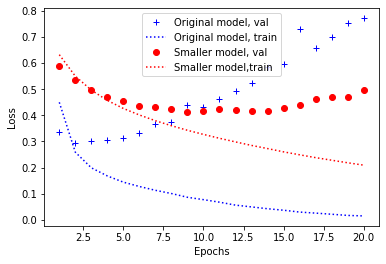

In [12]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model, val')
plt.plot(epochs, original_loss, 'b:', label='Original model, train')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'ro', label='Smaller model, val')
plt.plot(epochs, smaller_model_loss, 'r:', label='Smaller model,train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Question/Action

What does the divergence of the Losses for training and validation data mean?

Which model suffers more from this effect?

Which model seems to achieve the highest validation performance and at how many epochs?

In [13]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [14]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.4786 - acc: 0.7934 - val_loss: 0.2921 - val_acc: 0.8815
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2251 - acc: 0.9090 - val_loss: 0.2957 - val_acc: 0.8778
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1330 - acc: 0.9497 - val_loss: 0.3855 - val_acc: 0.8588
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0606 - acc: 0.9811 - val_loss: 0.4335 - val_acc: 0.8842
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0822 - acc: 0.9869 - val_loss: 0.4652 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 2.1411 - val_acc: 0.7393
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0773 - acc: 0.9900 - val_loss: 0.6699 - val_acc: 0.8794
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0040 - a

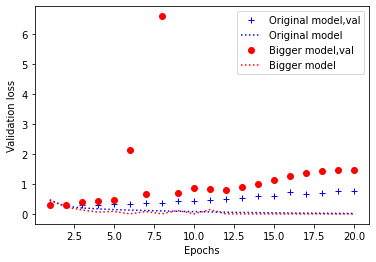

In [15]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']
bigger_model_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, original_loss, 'b:', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'ro', label='Bigger model,val')
plt.plot(epochs, bigger_model_loss, 'r:', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

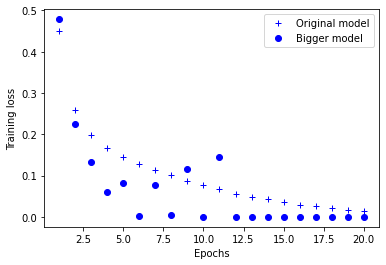

In [16]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [17]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

# Question

What is L2 regularization?

In [19]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.4828 - acc: 0.8189 - val_loss: 0.3775 - val_acc: 0.8759
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3139 - acc: 0.9032 - val_loss: 0.3333 - val_acc: 0.8902
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2655 - acc: 0.9239 - val_loss: 0.3985 - val_acc: 0.8555
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2493 - acc: 0.9282 - val_loss: 0.3436 - val_acc: 0.8822
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2395 - acc: 0.9312 - val_loss: 0.3501 - val_acc: 0.8809
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2323 - acc: 0.9357 - val_loss: 0.3639 - val_acc: 0.8762
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2241 - acc: 0.9394 - val_loss: 0.3586 - val_acc: 0.8798
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2213 - a

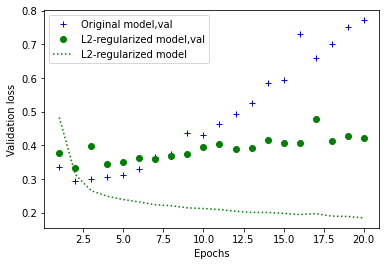

In [20]:
l2_model_val_loss = l2_model_hist.history['val_loss']
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, l2_model_val_loss, 'go', label='L2-regularized model,val')
plt.plot(epochs, l2_model_loss, 'g:', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Question/Action

What does this plot imply about the level of regularization?   How could you increase the regularization?  Can you get higher performance by doing this?

What happens if you look at accuracy instead of loss?

Can you create a model using L1 regularization?

Just what are L1 and L2 regularization anyway?

## Adding Dropout

# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)

# At test time:
layer_output *= 0.5

# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

In [21]:
drop_mag=0.5

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [22]:

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 37ms/step - loss: 0.6038 - acc: 0.6692 - val_loss: 0.4700 - val_acc: 0.8636
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4528 - acc: 0.8074 - val_loss: 0.3388 - val_acc: 0.8836
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3567 - acc: 0.8627 - val_loss: 0.2918 - val_acc: 0.8900
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3028 - acc: 0.8913 - val_loss: 0.2768 - val_acc: 0.8889
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2590 - acc: 0.9078 - val_loss: 0.2941 - val_acc: 0.8844
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2342 - acc: 0.9203 - val_loss: 0.2836 - val_acc: 0.8896
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2133 - acc: 0.9257 - val_loss: 0.3045 - val_acc: 0.8881
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1926 - a

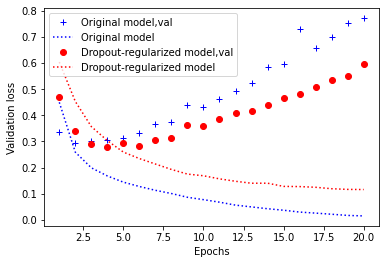

In [23]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
dpt_model_loss = dpt_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, original_loss, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'ro', label='Dropout-regularized model,val')
plt.plot(epochs, dpt_model_loss, 'r:', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

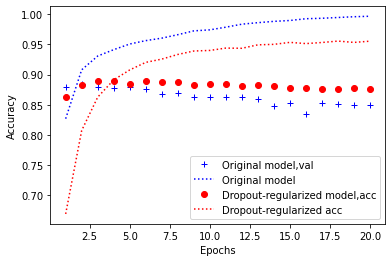

In [24]:
dpt_model_val_acc = dpt_model_hist.history['val_acc']
dpt_model_acc = dpt_model_hist.history['acc']

original_val_acc = original_hist.history['val_acc']
original_acc=original_hist.history['acc']

plt.plot(epochs, original_val_acc, 'b+', label='Original model,val')
plt.plot(epochs, original_acc, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'ro', label='Dropout-regularized model,acc')
plt.plot(epochs, dpt_model_acc, 'r:', label='Dropout-regularized acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Question/Action

Can you improve the performance by altering the dropout?

Can you create a plot that shows AUC instead of accuracy?